<a href="https://colab.research.google.com/github/Kammara-Kaveri/elevatelabs/blob/main/ml_task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [9]:
y_pred_linear = svm_linear.predict(X_test)
print("Accuracy (Linear SVM):", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))


Accuracy (Linear SVM): 0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [10]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)


SVC(C=1)

In [11]:
y_pred_rbf = svm_rbf.predict(X_test)
print("Accuracy (RBF SVM):", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


Accuracy (RBF SVM): 0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [12]:
X_2d = X[['mean radius', 'mean texture']]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

svm_2d = SVC(kernel='rbf', C=1, gamma='scale')
svm_2d.fit(X_train_2d, y_train_2d)


SVC(C=1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


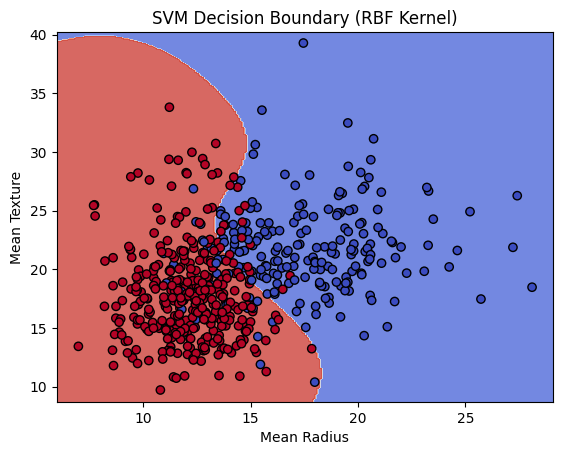

In [13]:
# Create meshgrid for plotting
x_min, x_max = X_2d.iloc[:, 0].min() - 1, X_2d.iloc[:, 0].max() + 1
y_min, y_max = X_2d.iloc[:, 1].min() - 1, X_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict labels for each point in the mesh
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_2d.iloc[:, 0], X_2d.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('SVM Decision Boundary (RBF Kernel)')
plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, verbose=1)
grid.fit(X_train, y_train)

print("Best parameters found:", grid.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters found: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [15]:
best_model = grid.best_estimator_
final_predictions = best_model.predict(X_test)
print("Final Accuracy after Tuning:", accuracy_score(y_test, final_predictions))


Final Accuracy after Tuning: 0.631578947368421
